### Übungsblatt 11, Aufgabe 2
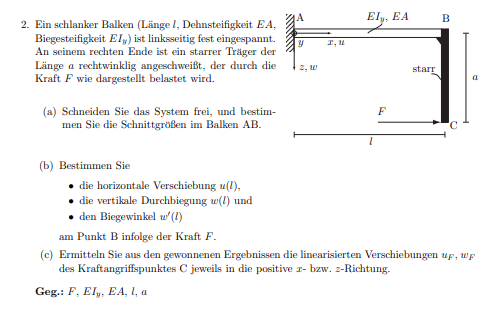

#### a) Schnittgrößen im Balken $AB$

In [1]:
from sympy import *
# Kraft F
F = symbols('F')

# Längen 
l, a = symbols('l, a')

# Schnittgrößen
N = F
Q = 0
M = F*a

#### b) horizontalte Verschiebung $u(l)$, vertikale Durchbiegung $w(l)$, Biegewinkel $w'(l)$

Die Differentialgleichungen zur Bestimmtung von $u(x)$ und $w(x)$ lauten
$$
\begin{align}
EA u'(x) &= N(x) = -F \, , \\
EI w''(x) &= -M(x) = - F a \, .
\end{align}
$$

Diese werden jeweils ein- bzw. zweimal integriert
$$
\begin{align}
EA u(x) &= -F x + C_1 \, , \\
EI w(x) &= -\frac{F a}{2} x^2 + C_2 x + C_3 \, .
\end{align}
$$

Die Integrationskonstanten $C_1$, $C_2$ und $C_3$ erhalten wir wie gewohnt über Randbedingungen. Die Randbedingungen sind $w(0) = 0$, $u(0) = 0$, $w'(0) = 0$ (Verschiebung/Durchbiegung und Biegewinkel = 0 an fester Einspannung). Daraus folgt unmittelbar $C_1 = C_2 = C_3 = 0$.

In [2]:
# Steifigkeiten
EA = symbols('EA') # Dehnsteifigkeit
EI = symbols('EI') # Biegesteifigkeit

# Koordinate
x = symbols('x')

# horizonale Verschiebung, Biegewinkel und vertikale Verschiebung/Durchbiegung
u  =   integrate(N,x) / EA
w_ = - integrate(M,x) / EI
w  =   integrate(w_,x)

In [3]:
uB = u.subs(x,l) # horiz. Verschiebung von B
uB

F*l/EA

In [4]:
w_B = w_.subs(x,l) # Biegewinkel bei B
w_B

-F*a*l/EI

In [5]:
wB = w.subs(x,l) # vertikale Verschiebung/Durchbiegung bei B
wB

-F*a*l**2/(2*EI)

#### c) Verschiebungen $u_F$, $w_F$ des Kraftangriffspunktes $C$, wenn der Balken $BC$ als starr angenommen wird.

In [63]:
uF = (u - a*w_).subs(x,l)
wF = w.subs(x,l)
uF

F*a**2*l/EI + F*l/EA

#### Graph des deformierten Balkens 
Um die Biegelinie zeichnen zu können, müssen wir Zahlenwerte für die gegebenen Größen $(a, l, F, EI, EA)$ auswählen. Wir wählen für unseren Balken $AB$ einen quadratischen Querschnitt mit der Kantenlänge $b=3 \, \mathrm{cm}$. Daraus kann die Querschnittsfläche und das Flächenträgheitsmoment bestimmt werden. Die Balkenlängen sind zu $a= 1 \, \mathrm{m}$ und $l = 0,\!7 \, \mathrm{m}$ gewählt. Ein relativ universeller E-Model für Baustahl ist $E=210 \, \mathrm{GPa}$. Die aufgebrachte Kraft wählen wir zu $F=2 \, \mathrm{kN}$, was auf der Erde grob der Gewichtskraft einer $200 \, \mathrm{kg}$ schweren Masse entspricht. Die Verschiebung des starren Balkens $BC$ wird als lineare Funktion modelliert, d.h. zwischen den beiden verschobenen Punkten $B_v=(l+u_B, w_B)$ und $C_v=(l+u_F, a+w_F)$ wird linear interpoliert. Da $u_B$ in der Regel deutlich kleiner als $u_F$ ist (können Sie erklären wieso?), kann $u_B$ beim Zeichnen auch vernachlässigt werden. 

In [80]:
params = {EA: 210e9 * 0.03**2, # in N
          EI: 210e9 * 1/12*0.03**4, # in Nm^2
          l: 1, # in m
          a: .7, # in m
          F: 2e3 # in N, 2kN entspricht ungefähr auf der Erde ungefähr 200 kg 
         }

# "Biegelinie" des starren Balkens BC, linearer Verlauf von (x1,z1)=(l+uB,wB) nach (x2,z2)=(l+uF,a+wF)
w2 = (a + wF - wB) / (uF-uB)*x + (wB*(l+uF) - (a+wF)*l) / (uF-uB)

wGes = -Piecewise((w, x<l), (w2, x>l))

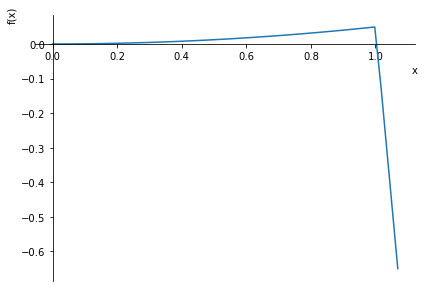

In [81]:
plot(wGes.subs(params), (x,0,(l+uF).subs(params)))